In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import pandas as pd
import os
import math
from sklearn.metrics import f1_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import rand_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering


# K-Means from scratch

In [ ]:
def kmeans(X, k):
    # init centers
    n=300
    samples = X.shape[0]

    #replace = False: he point has been chosen, and we can't use a point twice
    rand_cent = X[ np.random.choice(samples, k, replace = False) ] #Generates a random sample from a given 1-D array
    min_dis = np.zeros(samples)


    while True:
        #  copying a list
        old_assigning = min_dis.copy()

       #Computes the distance between  points using Euclidean distance (2-norm) as the distance metric between the points. The points are arranged as  -dimensional row vectors in the matrix X.
        distances = np.zeros((n,k))
        for i in range(k):
            distances[:,i]=((X-rand_cent[i])**2).sum(axis=1)**0.5


        min_dis = np.argmin(distances, axis=1)##minmumm distance###

        location_centroid_plots(X, rand_cent)

        #  update centers
        for i in range(k):
             rand_cent[i,:]=X[min_dis == i].mean(axis=0)
        #  break if converged
        if all(min_dis == old_assigning):
            break

    return min_dis

In [ ]:
def location_centroid_plots(X, rand):
    fig=plt.figure(figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')

    plt.scatter(X[:, 0], X[:, 1],
                s=50,
                marker='o',
                label='cluster 1')

    plt.scatter(rand[:, 0],
                rand[:, 1],
                s=200, c='red',
                marker='p')

# DBSCAN from scratch

In [ ]:
def DBSCAN(X, eps, MinPts):

    # list contains each point's assingment to cluster
    points_assignment = [0]*len(X) # at start, all labels = 0 (un visited)

    Cluster_No = 0

    for Point in range(0, len(X)): #point is an INDEX of the datapoint

        if (points_assignment[Point] != 0):
           continue

        neighbors = Find_Neighbors(X, Point, eps)

        # if neighbors < MinPts --> this is a noise point
        if len(neighbors) < MinPts:
            points_assignment[Point] = -1

        # if neigyhbors >= MinPts --> create new cluster
        else:
            Cluster_No +=1
            Create_Cluster(X, points_assignment, Point, neighbors, Cluster_No, eps, MinPts)

    return points_assignment

In [ ]:
def Create_Cluster(X, points_assignment, Point, neighbors, Cluster_No, eps, MinPts):

    points_assignment[Point] = Cluster_No

    i = 0
    while i < len(neighbors):

        neighboring_points = neighbors[i]

        if points_assignment[neighboring_points] == -1:
           points_assignment[neighboring_points] = Cluster_No   #leaf point



        elif points_assignment[neighboring_points] == 0:
            points_assignment[neighboring_points] = Cluster_No

            # finding neighbors of this neighbor
            neighboors_for_Pneigh = Find_Neighbors(X, neighboring_points, eps)

            # if its neighboors >= MinPts --> it is a branch point
            if len(neighboors_for_Pneigh) >= MinPts:
                # add neighboors_for_Pneigh to FIFO queue
                neighbors = neighbors + neighboors_for_Pneigh


        i += 1

In [ ]:
def Find_Neighbors(X, Point, eps):
    neighbors = []

    for p in range(0, len(X)):

        value = Euclidean_Distance( X[Point], X[p] )

        if( eps > value):
           neighbors.append(p)

    return neighbors

# Measuring distances using euclidean distance

In [ ]:
import math

def Euclidean_Distance (x, y):
    value = math.sqrt( (x[0]-y[0])**2 + (x[1]-y[1])**2 )
    return value

# Dataset No.1

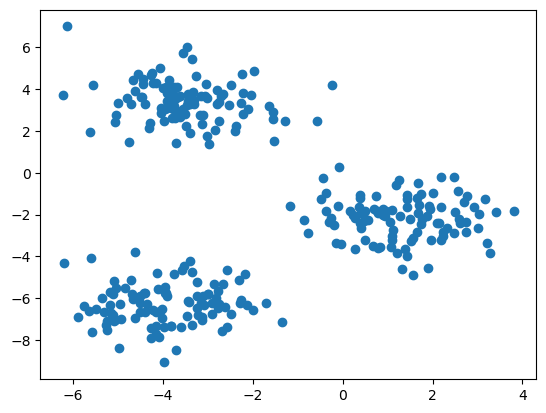

In [ ]:
n_samples = 300   #the numer of random data samples
random_state=60
X,y = datasets.make_blobs(n_samples=n_samples,random_state=random_state)

plt.scatter(X[:, 0], X[:, 1])

## K-MEANS

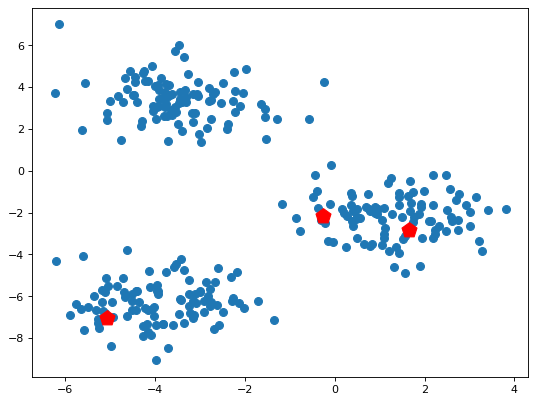

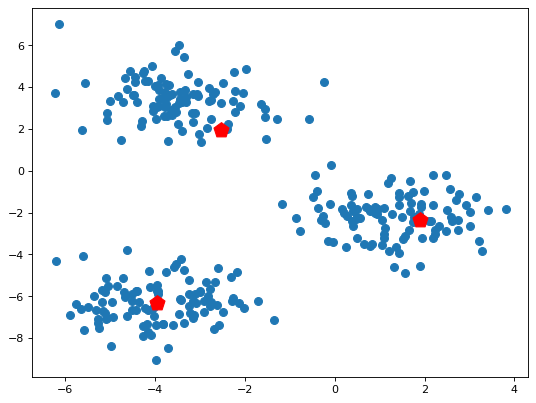

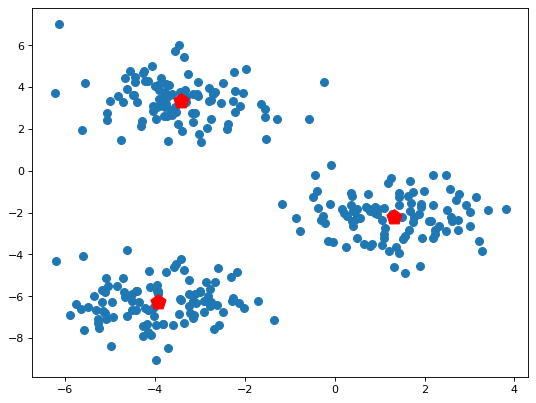

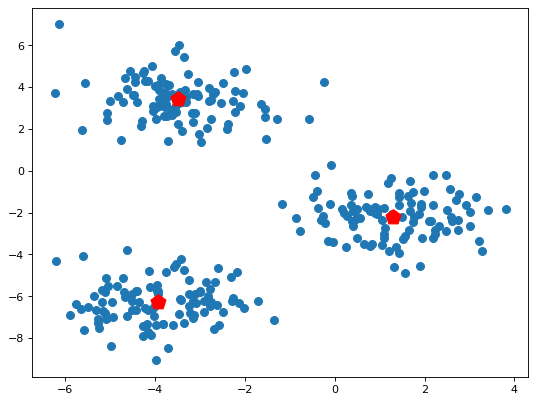

In [ ]:
k = 3
labels_KM_DATA1= kmeans(X, k)

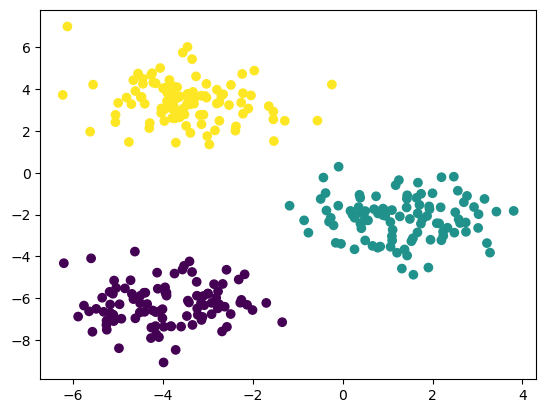

In [ ]:
plt.scatter(X[:,0],X[:,1],c=labels_KM_DATA1)

In [ ]:
y_true = y
y_pred_KM_DATA1 = labels_KM_DATA1

# f1 score:
KM_DATA1_f1=f1_score(y_true, y_pred_KM_DATA1, average='macro')
print("f1 score = ", KM_DATA1_f1)

#NMI
KM_DATA1_NMI=normalized_mutual_info_score(y_true, y_pred_KM_DATA1)
print("NMI = ",  KM_DATA1_NMI)

#Rand score
KM_DATA1_Rand=rand_score(y_true, y_pred_KM_DATA1)
print("Rand score = ", KM_DATA1_Rand)

f1 score =  0.3333333333333333
NMI =  1.0
Rand score =  1.0


## DBSCAN

In [ ]:
# MinPts:
# MinPts >= diminsion*2
# MinPts >= 2*2
# MinPts = 4

MinPts = 4

### Finding the best epsilon value:

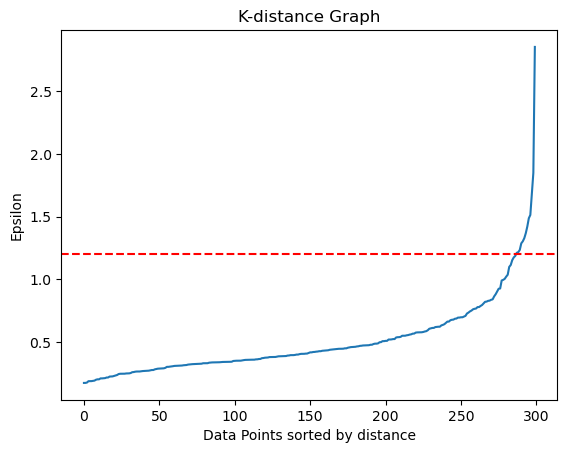

In [ ]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors= (MinPts + 1))
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,4]
plt.plot(distances)

plt.axhline(y=1.2, color='r', linestyle='--')

plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

In [ ]:
eps = 1.2

In [ ]:
# calling of function DBSCAN return labels (cluster assignment for each point)

labels_DB_DATA1 = DBSCAN(X, eps, MinPts)
#dbscan_labels

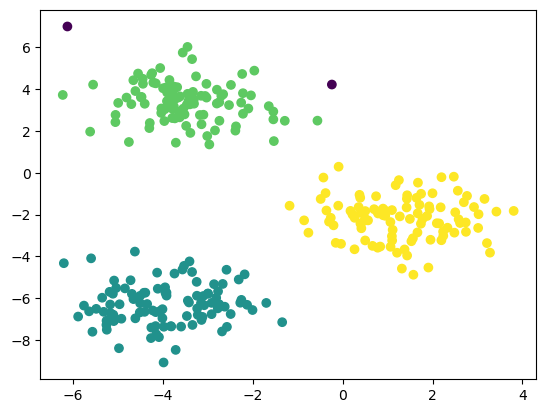

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = labels_DB_DATA1 )

In [ ]:
y_true = y
y_pred_DB_DATA1 = labels_DB_DATA1

# f1 score:
DB_DATA1_f1=f1_score(y_true, y_pred_DB_DATA1, average='macro')
print("f1 score = ", DB_DATA1_f1)

#NMI
DB_DATA1_NMI=normalized_mutual_info_score(y_true, y_pred_DB_DATA1)
print("NMI = ", DB_DATA1_NMI)

#Rand score
DB_DATA1_Rand=rand_score(y_true, y_pred_DB_DATA1)
print("Rand score = ", DB_DATA1_Rand)

f1 score =  0.0
NMI =  0.9853447949789381
Rand score =  0.9956298773690078


## GMM

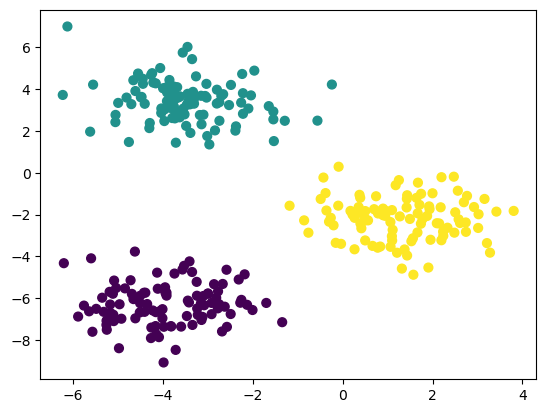

In [ ]:
gmm_DATA1 = GaussianMixture(n_components=3).fit(X) #n_components = number of clusters
labels_GMM_DATA1 = gmm_DATA1.predict(X) #determines which point belong to which cluster

plt.scatter(X[:, 0], X[:, 1], c=labels_GMM_DATA1, s=40, cmap='viridis');

In [ ]:
y_true = y
y_pred_GMM_DATA1 = labels_GMM_DATA1

# f1 score:
GMM_DATA1_f1=f1_score(y_true, y_pred_GMM_DATA1, average='macro')
print("f1 score = ", GMM_DATA1_f1)

#NMI
GMM_DATA1_NMI=normalized_mutual_info_score(y_true, y_pred_GMM_DATA1)
print("NMI = ", GMM_DATA1_NMI)

#Rand score
GMM_DATA1_Rand=rand_score(y_true, y_pred_GMM_DATA1)
print("Rand score = ", GMM_DATA1_Rand)

f1 score =  1.0
NMI =  1.0
Rand score =  1.0


## Hierarchical

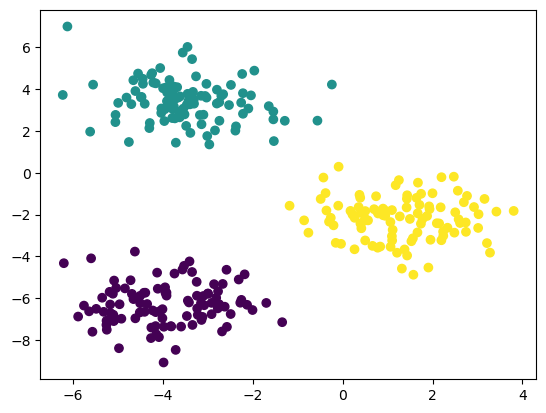

In [ ]:
AggClustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

labels_Agg_DATA1 = AggClustering.fit_predict(X)

plt.scatter(X[:,0],X[:,1],c=labels_Agg_DATA1)

In [ ]:
y_true = y
y_pred_DATA1_Agg = labels_Agg_DATA1

# f1 score:
H_Agg_DATA1_f1=f1_score(y_true, labels_Agg_DATA1, average='macro')
print("f1 score = ", H_Agg_DATA1_f1)
#NMI
H_Agg_DATA1_NMI=normalized_mutual_info_score(y_true, labels_Agg_DATA1)
print("NMI = ", H_Agg_DATA1_NMI)

#Rand score
H_Agg_DATA1_Rand=rand_score(y_true, labels_Agg_DATA1)
print("Rand score = ", H_Agg_DATA1_Rand)

f1 score =  1.0
NMI =  1.0
Rand score =  1.0


# Dataset No.2: Anisotropicly distributed dataset.

In [ ]:
X, _ = datasets.make_blobs(n_samples=n_samples,random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]

X = np.dot(X, transformation)

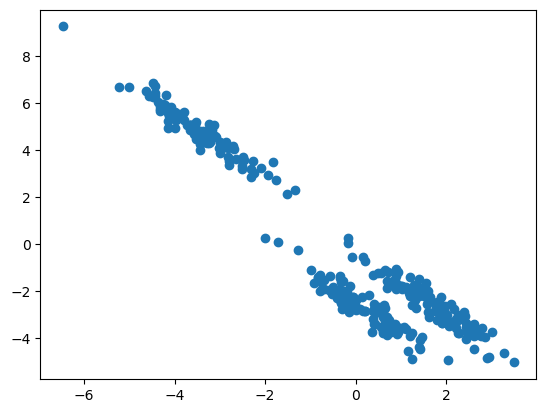

In [ ]:
plt.scatter(X[:, 0], X[:, 1] )

## K-MEANS

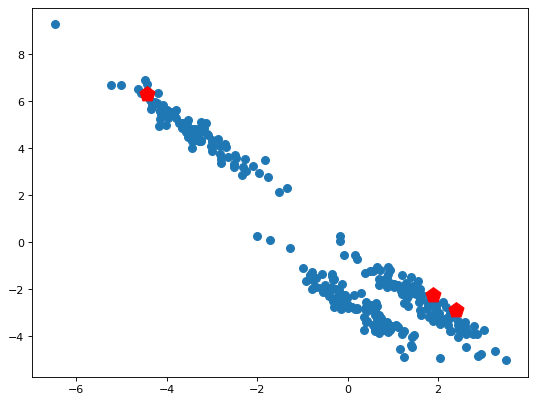

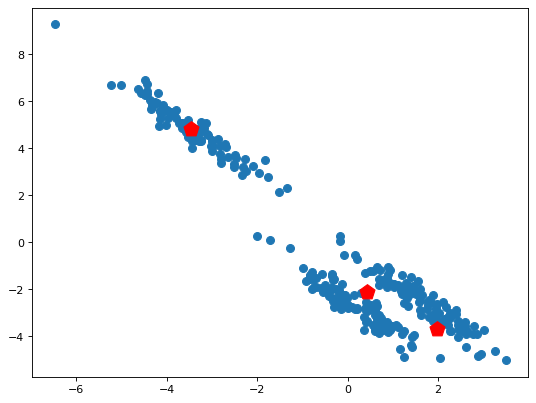

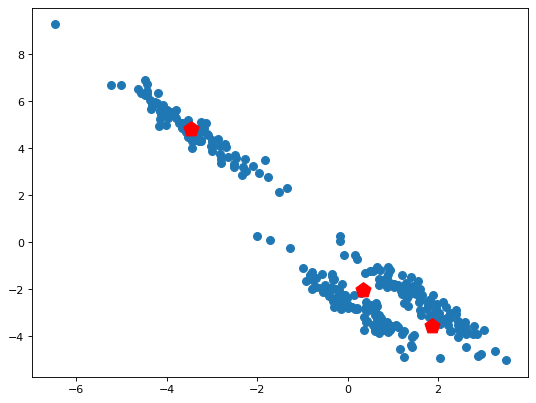

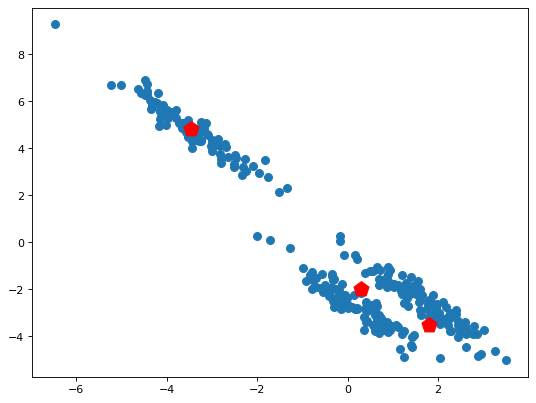

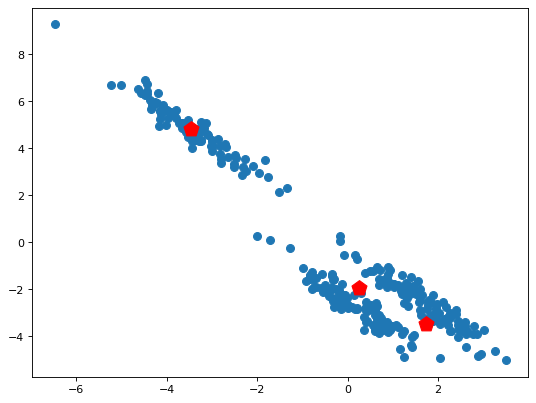

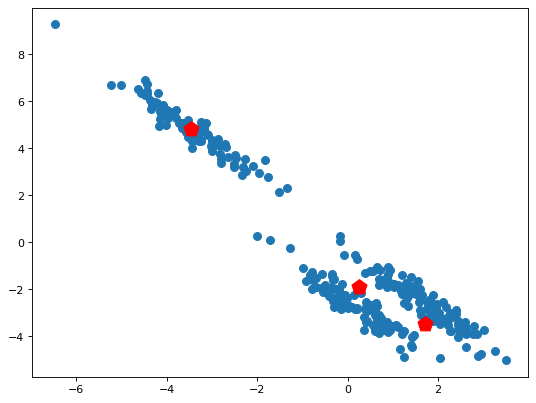

In [ ]:
k = 3
labels_KM_DATA2= kmeans(X, k)

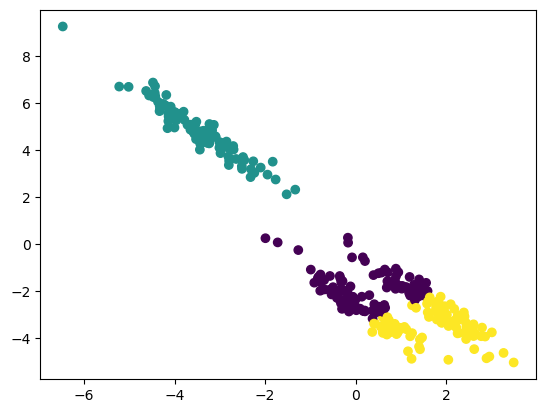

In [ ]:
plt.scatter(X[:,0],X[:,1],c=labels_KM_DATA2)

In [ ]:
y_true = y
y_pred_KM_DATA2 = labels_KM_DATA2

# f1 score:
KM_DATA2_f1=f1_score(y_true, y_pred_KM_DATA2, average='macro')
print("f1 score = ", KM_DATA2_f1)

#NMI
KM_DATA2_NMI=normalized_mutual_info_score(y_true, y_pred_KM_DATA2)
print("NMI = ",  KM_DATA2_NMI)

#Rand score
KM_DATA2_Rand=rand_score(y_true, y_pred_KM_DATA2)
print("Rand score = ", KM_DATA2_Rand)

f1 score =  0.7326649958228906
NMI =  0.592627260904785
Rand score =  0.7859531772575251


## DBSCAN

### Finding the best epsilon value:

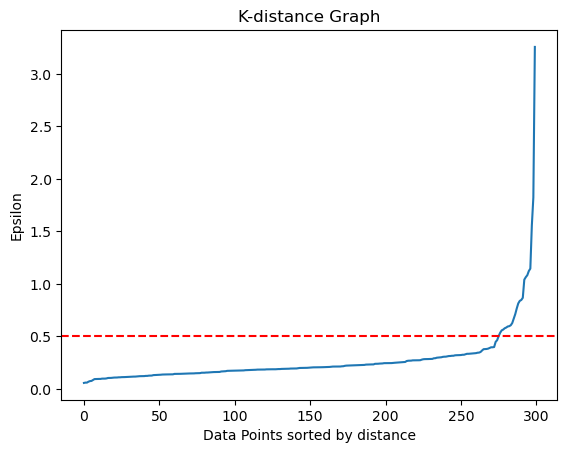

In [ ]:
#eps:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors = (MinPts + 1))
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,4]
plt.plot(distances)

plt.axhline(y=0.5, color='r', linestyle='--')

plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

In [ ]:
eps = 0.5

In [ ]:
# calling of function DBSCAN return labels (cluster assignment for each point)

labels_DB_DATA2 = DBSCAN(X, eps, MinPts)
#dbscan_labels

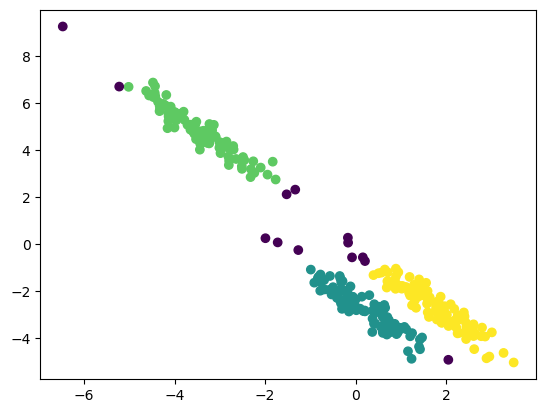

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = labels_DB_DATA2 )

In [ ]:
y_true = y
y_pred_DB_DATA2 = labels_DB_DATA2

# f1 score:
DB_DATA2_f1=f1_score(y_true, y_pred_DB_DATA2, average='macro')
print("f1 score = ", DB_DATA2_f1)

#NMI
DB_DATA2_NMI=normalized_mutual_info_score(y_true, y_pred_DB_DATA2)
print("NMI = ", DB_DATA2_NMI)

#Rand score
DB_DATA2_Rand=rand_score(y_true, y_pred_DB_DATA2)
print("Rand score = ", DB_DATA2_Rand)

f1 score =  0.0
NMI =  0.9031399470096727
Rand score =  0.9710367892976589


## GMM

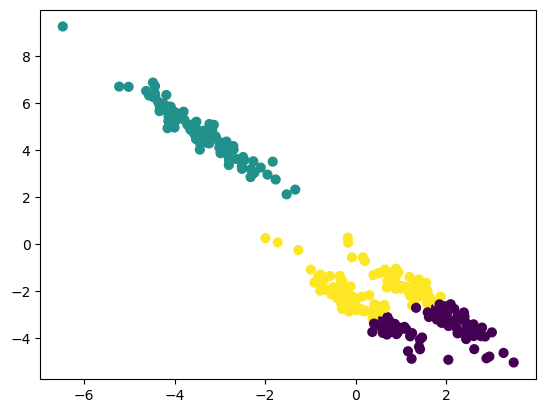

In [ ]:
gmm_DATA2 = GaussianMixture(n_components=3).fit(X) #n_components = number of clusters
labels_GMM_DATA2 = gmm_DATA2.predict(X) #determines which point belong to which cluster

plt.scatter(X[:, 0], X[:, 1], c=labels_GMM_DATA2, s=40, cmap='viridis');

In [ ]:
y_true = y
y_pred_GMM_DATA2 = labels_GMM_DATA2

# f1 score:
GMM_DATA2_f1=f1_score(y_true, y_pred_GMM_DATA2, average='macro')
print("f1 score = ", GMM_DATA2_f1)

#NMI
GMM_DATA2_NMI=normalized_mutual_info_score(y_true, y_pred_GMM_DATA2)
print("NMI = ", GMM_DATA2_NMI)

#Rand score
GMM_DATA2_Rand=rand_score(y_true, y_pred_GMM_DATA2)
print("Rand score = ", GMM_DATA2_Rand)

f1 score =  0.6175523349436394
NMI =  0.5877988011484988
Rand score =  0.7814046822742475


## Hierarchical

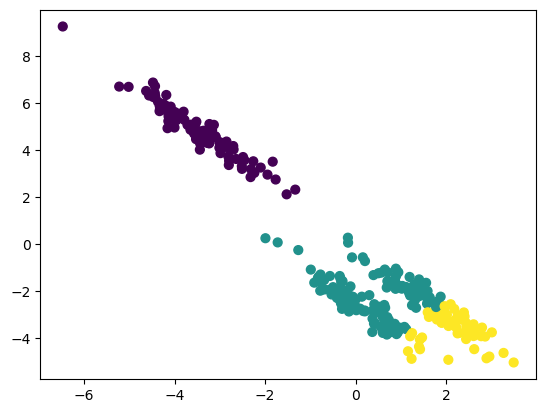

In [ ]:
AggClustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

labels_Agg_DATA2 = AggClustering.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels_Agg_DATA2, s=40, cmap='viridis');

In [ ]:
y_true = y
y_pred_DATA2_Agg = labels_Agg_DATA2

# f1 score:
H_Agg_DATA2_f1=f1_score(y_true, labels_Agg_DATA2, average='macro')
print("f1 score = ", H_Agg_DATA2_f1)
#NMI
H_Agg_DATA2_NMI=normalized_mutual_info_score(y_true, labels_Agg_DATA2)
print("NMI = ", H_Agg_DATA2_NMI)

#Rand score
H_Agg_DATA2_Rand=rand_score(y_true, labels_Agg_DATA2)
print("Rand score = ", H_Agg_DATA2_Rand)

f1 score =  0.1948051948051948
NMI =  0.654556572898646
Rand score =  0.8059308807134894


# Dataset No.3: Noisy moons dataset

In [ ]:
X, y = datasets.make_moons(n_samples=n_samples, noise=0.1,random_state=random_state)

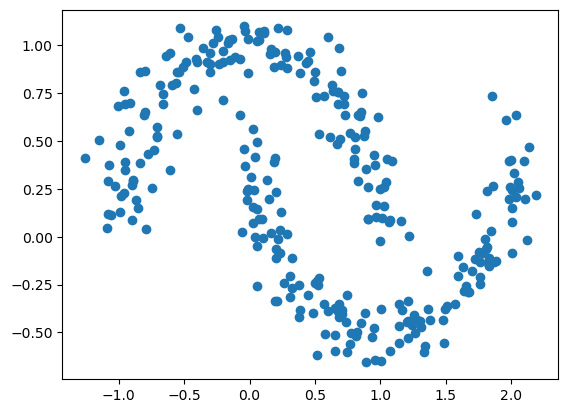

In [ ]:
plt.scatter(X[:, 0], X[:, 1] )

## K-MEANS

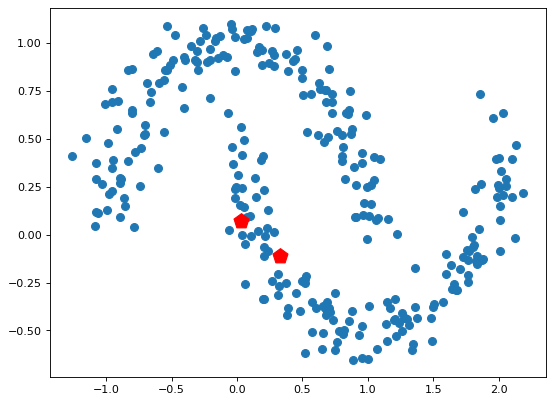

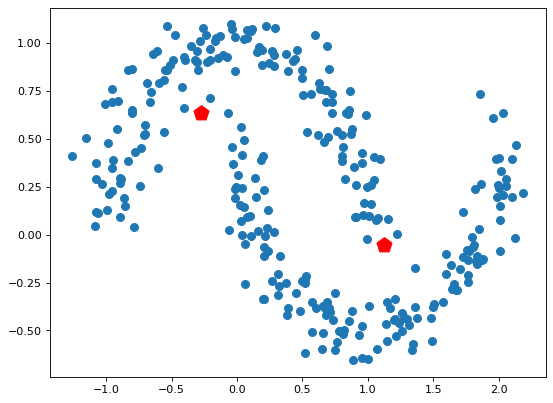

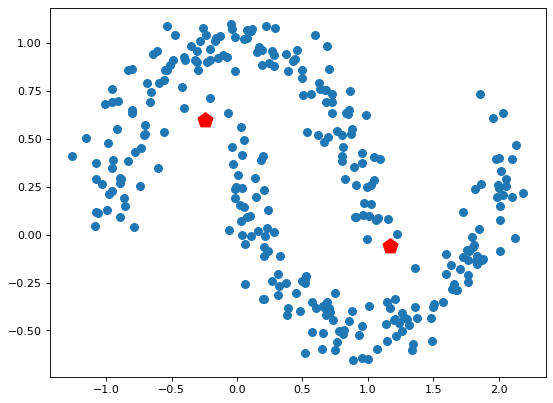

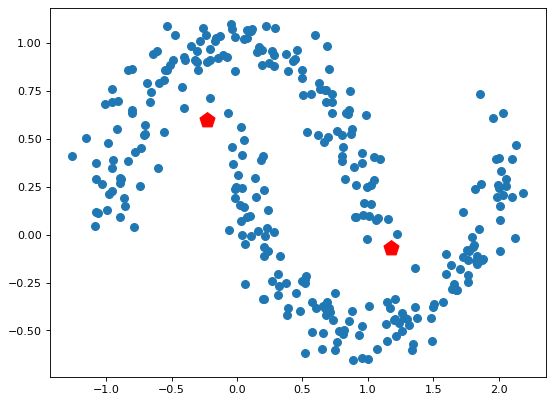

In [ ]:
k = 2
labels_KM_DATA3= kmeans(X, k)

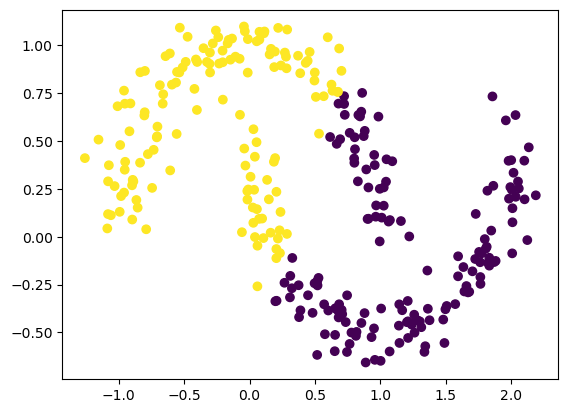

In [ ]:
plt.scatter(X[:,0],X[:,1],c=labels_KM_DATA3)

In [ ]:
y_true = y
y_pred_KM_DATA3 = labels_KM_DATA3

# f1 score:
KM_DATA3_f1=f1_score(y_true, y_pred_KM_DATA3, average='macro')
print("f1 score = ", KM_DATA3_f1)

#NMI
KM_DATA3_NMI=normalized_mutual_info_score(y_true, y_pred_KM_DATA3)
print("NMI = ",  KM_DATA3_NMI)

#Rand score
KM_DATA3_Rand=rand_score(y_true, y_pred_KM_DATA3)
print("Rand score = ", KM_DATA3_Rand)

f1 score =  0.24636521275176737
NMI =  0.19455989943471355
Rand score =  0.6271125975473801


## DBSCAN

### Finding the best epsilon value:

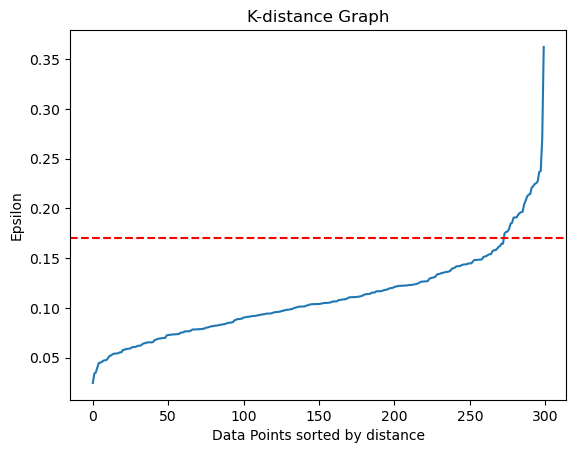

In [ ]:
#eps:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors = (MinPts + 1))
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,4]
plt.plot(distances)

plt.axhline(y=0.17, color='r', linestyle='--')

plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

In [ ]:
eps = 0.17

In [ ]:
# calling of function DBSCAN return labels (cluster assignment for each point)

labels_DB_DATA3 = DBSCAN(X, eps, MinPts)
#dbscan_labels

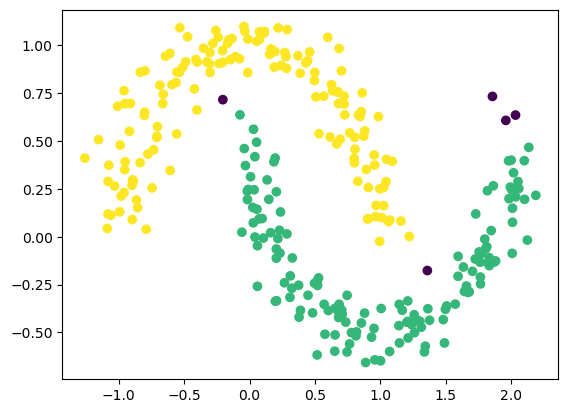

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = labels_DB_DATA3 )

In [ ]:
y_true = y
y_pred_DB_DATA3 = labels_DB_DATA3

# f1 score:
DB_DATA3_f1=f1_score(y_true, y_pred_DB_DATA3, average='macro')
print("f1 score = ", DB_DATA3_f1)

#NMI
DB_DATA3_NMI=normalized_mutual_info_score(y_true, y_pred_DB_DATA3)
print("NMI = ", DB_DATA3_NMI)

#Rand score
DB_DATA3_Rand=rand_score(y_true, y_pred_DB_DATA3)
print("Rand score = ", DB_DATA3_Rand)

f1 score =  0.24662162162162163
NMI =  0.9384409086288443
Rand score =  0.9835674470457079


## GMM

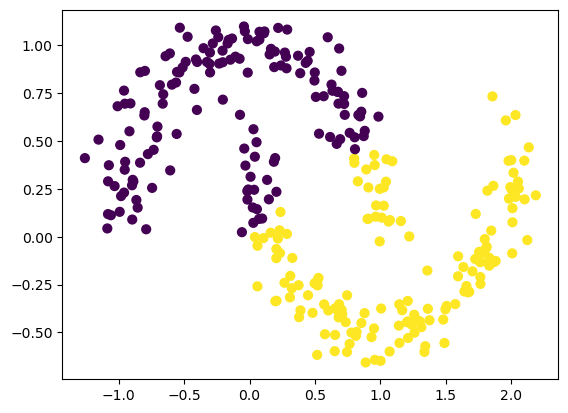

In [ ]:
gmm_DATA3 = GaussianMixture(n_components=2).fit(X) #n_components = number of clusters
labels_GMM_DATA3 = gmm_DATA3.predict(X) #determines which point belong to which cluster

plt.scatter(X[:, 0], X[:, 1], c=labels_GMM_DATA3, s=40, cmap='viridis');

In [ ]:
y_true = y
y_pred_GMM_DATA3 = labels_GMM_DATA3

# f1 score:
GMM_DATA3_f1=f1_score(y_true, y_pred_GMM_DATA3, average='macro')
print("f1 score = ", GMM_DATA3_f1)

#NMI
GMM_DATA3_NMI=normalized_mutual_info_score(y_true, y_pred_GMM_DATA3)
print("NMI = ", GMM_DATA3_NMI)

#Rand score
GMM_DATA3_Rand=rand_score(y_true, y_pred_GMM_DATA3)
print("Rand score = ", GMM_DATA3_Rand)

f1 score =  0.8499983333148147
NMI =  0.39019675698700557
Rand score =  0.7441471571906354


## Hierarchical

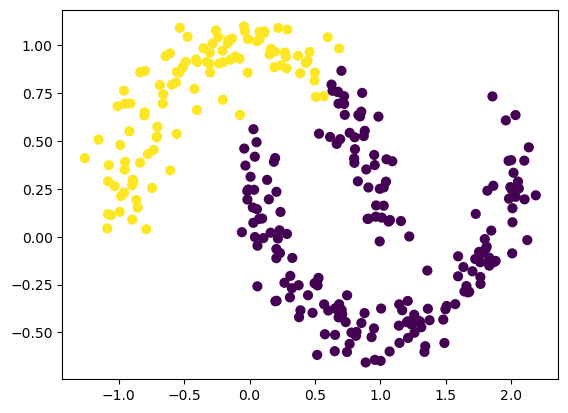

In [ ]:
AggClustering = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')

labels_Agg_DATA3 = AggClustering.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels_Agg_DATA3, s=40, cmap='viridis');

In [ ]:
y_true = y
y_pred_DATA3_Agg = labels_Agg_DATA3

# f1 score:
H_Agg_DATA3_f1=f1_score(y_true, labels_Agg_DATA3, average='macro')
print("f1 score = ", H_Agg_DATA3_f1)
#NMI
H_Agg_DATA3_NMI=normalized_mutual_info_score(y_true, labels_Agg_DATA3)
print("NMI = ", H_Agg_DATA3_NMI)

#Rand score
H_Agg_DATA3_Rand=rand_score(y_true, labels_Agg_DATA3)
print("Rand score = ", H_Agg_DATA3_Rand)

f1 score =  0.13725490196078433
NMI =  0.4762345333679514
Rand score =  0.7348717948717949


# Dataset No.4: noisy circles dataset

In [ ]:

X,y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05, random_state=random_state)

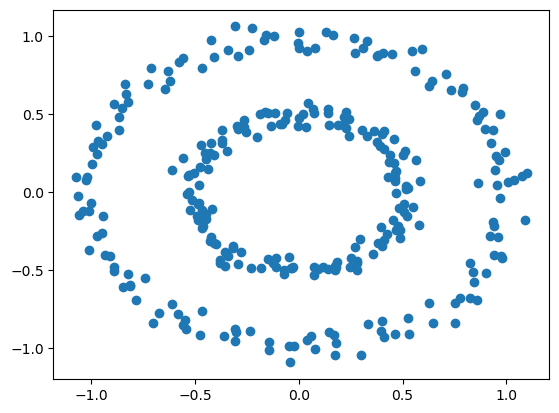

In [ ]:
plt.scatter(X[:, 0], X[:, 1] )

## KMEANS

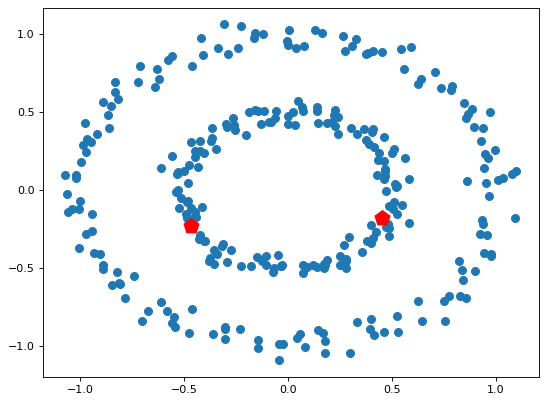

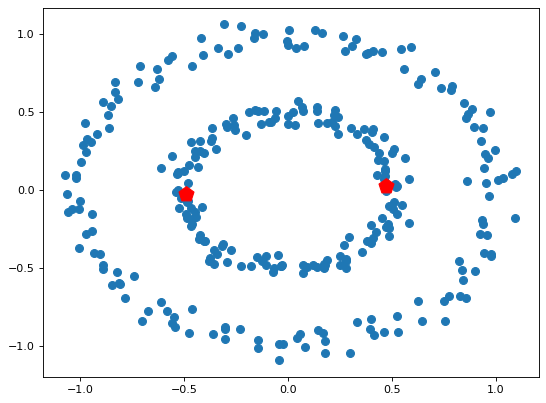

In [ ]:
k = 2
labels_KM_DATA4= kmeans(X, k)

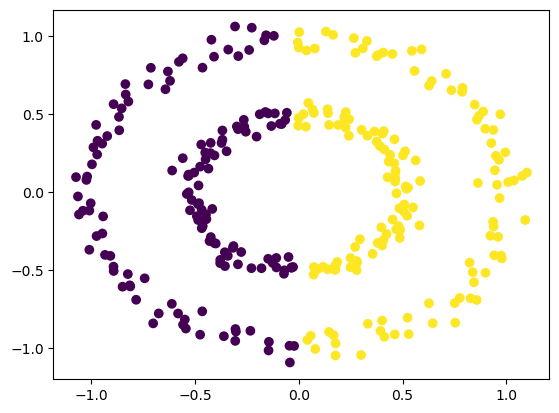

In [ ]:
plt.scatter(X[:,0],X[:,1],c=labels_KM_DATA4)

In [ ]:
y_true = y
y_pred_KM_DATA4 = labels_KM_DATA4

# f1 score:
KM_DATA4_f1=f1_score(y_true, y_pred_KM_DATA4, average='macro')
print("f1 score = ", KM_DATA4_f1)

#NMI
KM_DATA4_NMI=normalized_mutual_info_score(y_true, y_pred_KM_DATA4)
print("NMI = ",  KM_DATA4_NMI)

#Rand score
KM_DATA4_Rand=rand_score(y_true, y_pred_KM_DATA4)
print("Rand score = ", KM_DATA4_Rand)

f1 score =  0.4966163282994966
NMI =  3.2077585067024374e-05
Rand score =  0.4983500557413601


## DBSCAN

### Finding the best epsilon value:

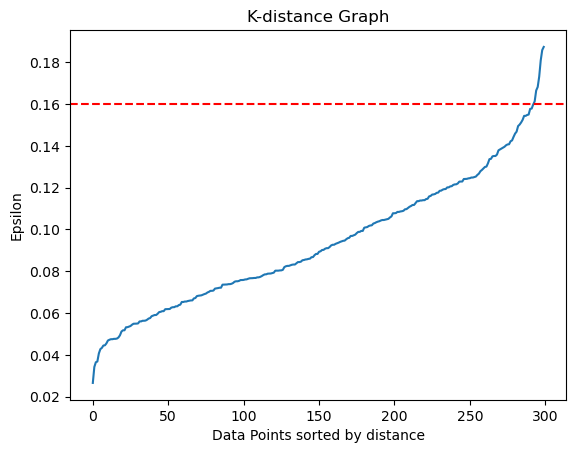

In [ ]:
#eps:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors = (MinPts + 1))
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,4]
plt.plot(distances)

plt.axhline(y=0.16, color='r', linestyle='--')

plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

In [ ]:
eps = 0.16

In [ ]:
# calling of function DBSCAN return labels (cluster assignment for each point)

labels_DB_DATA4 = DBSCAN(X, eps, MinPts)
#dbscan_labels

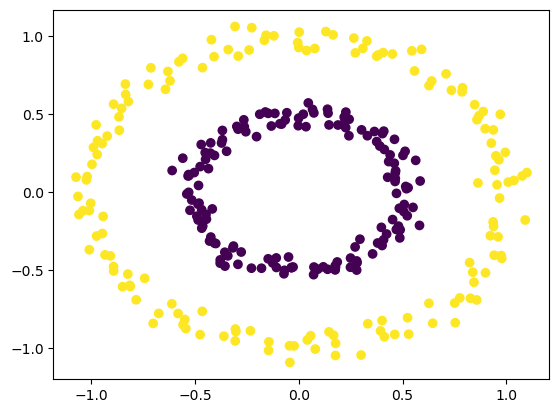

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = labels_DB_DATA4 )

In [ ]:
y_true = y
y_pred_DB_DATA4 = labels_DB_DATA4

# f1 score:
DB_DATA4_f1=f1_score(y_true, y_pred_DB_DATA4, average='macro')
print("f1 score = ", DB_DATA4_f1)

#NMI
DB_DATA4_NMI=normalized_mutual_info_score(y_true, y_pred_DB_DATA4)
print("NMI = ", DB_DATA4_NMI)

#Rand score
DB_DATA4_Rand=rand_score(y_true, y_pred_DB_DATA4)
print("Rand score = ", DB_DATA4_Rand)

f1 score =  0.3333333333333333
NMI =  1.0
Rand score =  1.0


## GMM

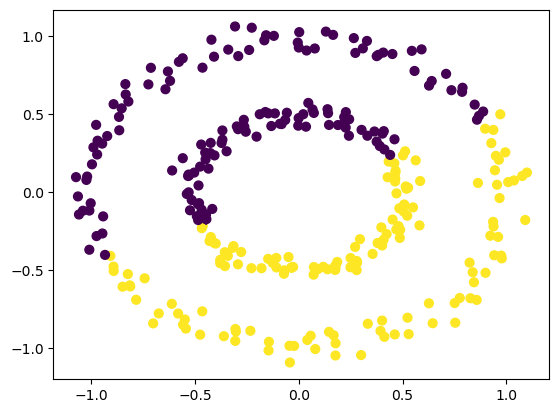

In [ ]:
gmm_DATA4 = GaussianMixture(n_components=2).fit(X) #n_components = number of clusters
labels_GMM_DATA4 = gmm_DATA3.predict(X) #determines which point belong to which cluster

plt.scatter(X[:, 0], X[:, 1], c=labels_GMM_DATA4, s=40, cmap='viridis');

In [ ]:
y_true = y
y_pred_GMM_DATA4 = labels_GMM_DATA4

# f1 score:
GMM_DATA4_f1=f1_score(y_true, y_pred_GMM_DATA4, average='macro')
print("f1 score = ", GMM_DATA4_f1)

#NMI
GMM_DATA4_NMI=normalized_mutual_info_score(y_true, y_pred_GMM_DATA4)
print("NMI = ", GMM_DATA4_NMI)

#Rand score
GMM_DATA4_Rand=rand_score(y_true, y_pred_GMM_DATA4)
print("Rand score = ", GMM_DATA4_Rand)

f1 score =  0.4966163282994966
NMI =  3.2077585067024374e-05
Rand score =  0.4983500557413601


## Hierarchical

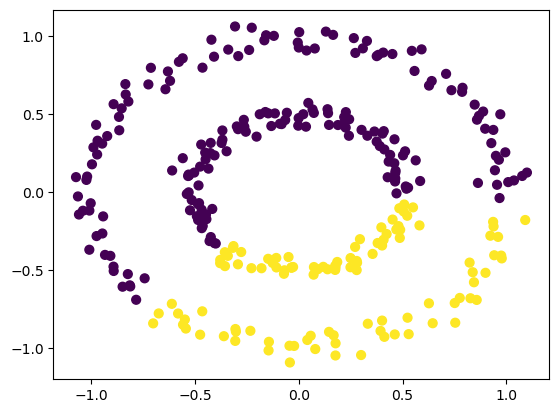

In [ ]:
AggClustering = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')

labels_Agg_DATA4 = AggClustering.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels_Agg_DATA4, s=40, cmap='viridis');

In [ ]:
y_true = y
y_pred_DATA4_Agg = labels_Agg_DATA4

# f1 score:
H_Agg_DATA4_f1=f1_score(y_true, labels_Agg_DATA4, average='macro')
print("f1 score = ", H_Agg_DATA4_f1)
#NMI
H_Agg_DATA4_NMI=normalized_mutual_info_score(y_true, labels_Agg_DATA4)
print("NMI = ", H_Agg_DATA4_NMI)

#Rand score
H_Agg_DATA4_Rand=rand_score(y_true, labels_Agg_DATA4)
print("Rand score = ", H_Agg_DATA4_Rand)

f1 score =  0.49680402556779546
NMI =  0.00014326043969011356
Rand score =  0.4984169453734671


# Summary Dataset 1:

In [ ]:
table = [['K-Means'          ,KM_DATA1_f1,      KM_DATA1_NMI,       KM_DATA1_Rand],
         ['DBSCAN'           ,DB_DATA1_f1,      DB_DATA1_NMI,       DB_DATA1_Rand],
         ['GMM'              ,GMM_DATA1_f1,     GMM_DATA1_NMI,      GMM_DATA1_Rand],
         ['Hierarchical'     ,H_Agg_DATA1_f1,   H_Agg_DATA1_NMI,    H_Agg_DATA1_Rand], ]

df_rank = pd.DataFrame(table, columns=['Models', 'F-Measures', 'NMI', 'Rand Statistic'])
df_rank.set_index('Models')

,F-Measures,NMI,Rand Statistic
Models,,,
K-Means,0.333333,1.000000,1.00000
DBSCAN,0.000000,0.985345,0.99563
GMM,1.000000,1.000000,1.00000
Hierarchical,1.000000,1.000000,1.00000


## Ranking Models of Dataset 1:

In [ ]:

df_rank = pd.DataFrame(table, columns=['Models', 'F-measures', 'NMI', 'Rand Statistic'])

df_rank['F-measures']=df_rank['F-measures'].rank(ascending=False)
df_rank['NMI']=df_rank['NMI'].rank(ascending=False)
df_rank['Rand Statistic']=df_rank['Rand Statistic'].rank(ascending=False)

df_rank['rank'] = df_rank.mean(axis=1)
df_rank['rank']= df_rank['rank'].rank(ascending=True)

df_rank=df_rank.set_index('Models')
df_rank

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


,F-measures,NMI,Rand Statistic,rank
Models,,,,
K-Means,3.0,2.0,2.0,3.0
DBSCAN,4.0,4.0,4.0,4.0
GMM,1.5,2.0,2.0,1.5
Hierarchical,1.5,2.0,2.0,1.5


# Summary Dataset 2:

In [ ]:
table = [['K-Means'          ,KM_DATA2_f1,      KM_DATA2_NMI,       KM_DATA2_Rand],
         ['DBSCAN'           ,DB_DATA2_f1,      DB_DATA2_NMI,       DB_DATA2_Rand],
         ['GMM'              ,GMM_DATA2_f1,     GMM_DATA2_NMI,      GMM_DATA2_Rand],
         ['Hierarchical'     ,H_Agg_DATA2_f1,   H_Agg_DATA2_NMI,    H_Agg_DATA2_Rand], ]

df_rank = pd.DataFrame(table, columns=['Models', 'F-Measures', 'NMI', 'Rand Statistic'])
df_rank.set_index('Models')

,F-Measures,NMI,Rand Statistic
Models,,,
K-Means,0.732665,0.592627,0.785953
DBSCAN,0.000000,0.903140,0.971037
GMM,0.617552,0.587799,0.781405
Hierarchical,0.194805,0.654557,0.805931


## Ranking Models of Dataset 2:

In [ ]:
df_rank = pd.DataFrame(table, columns=['Models', 'F-measures', 'NMI', 'Rand Statistic'])

df_rank['F-measures']=df_rank['F-measures'].rank(ascending=False)
df_rank['NMI']=df_rank['NMI'].rank(ascending=False)
df_rank['Rand Statistic']=df_rank['Rand Statistic'].rank(ascending=False)

df_rank['rank'] = df_rank.mean(axis=1)
df_rank['rank']= df_rank['rank'].rank(ascending=True)

df_rank=df_rank.set_index('Models')
df_rank

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


,F-measures,NMI,Rand Statistic,rank
Models,,,,
K-Means,1.0,3.0,3.0,2.5
DBSCAN,4.0,1.0,1.0,1.0
GMM,2.0,4.0,4.0,4.0
Hierarchical,3.0,2.0,2.0,2.5


# Summary Dataset 3:

In [ ]:
table = [['K-Means'          ,KM_DATA3_f1,      KM_DATA3_NMI,       KM_DATA3_Rand],
         ['DBSCAN'           ,DB_DATA3_f1,      DB_DATA3_NMI,       DB_DATA3_Rand],
         ['GMM'              ,GMM_DATA3_f1,     GMM_DATA3_NMI,      GMM_DATA3_Rand],
         ['Hierarchical'     ,H_Agg_DATA3_f1,   H_Agg_DATA3_NMI,    H_Agg_DATA3_Rand], ]

df_rank = pd.DataFrame(table, columns=['Models', 'F-Measures', 'NMI', 'Rand Statistic'])
df_rank.set_index('Models')

,F-Measures,NMI,Rand Statistic
Models,,,
K-Means,0.246365,0.194560,0.627113
DBSCAN,0.246622,0.938441,0.983567
GMM,0.849998,0.390197,0.744147
Hierarchical,0.137255,0.476235,0.734872


## Ranking Models of Dataset 3:

In [ ]:
df_rank = pd.DataFrame(table, columns=['Models', 'F-measures', 'NMI', 'Rand Statistic'])

df_rank['F-measures']=df_rank['F-measures'].rank(ascending=False)
df_rank['NMI']=df_rank['NMI'].rank(ascending=False)
df_rank['Rand Statistic']=df_rank['Rand Statistic'].rank(ascending=False)

df_rank['rank'] = df_rank.mean(axis=1)
df_rank['rank']= df_rank['rank'].rank(ascending=True)

df_rank=df_rank.set_index('Models')
df_rank

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


,F-measures,NMI,Rand Statistic,rank
Models,,,,
K-Means,3.0,4.0,4.0,4.0
DBSCAN,2.0,1.0,1.0,1.0
GMM,1.0,3.0,2.0,2.0
Hierarchical,4.0,2.0,3.0,3.0


# Summary Dataset 4:

In [ ]:
table = [['K-Means'          ,KM_DATA4_f1,      KM_DATA4_NMI,       KM_DATA4_Rand],
         ['DBSCAN'           ,DB_DATA4_f1,      DB_DATA4_NMI,       DB_DATA4_Rand],
         ['GMM'              ,GMM_DATA4_f1,     GMM_DATA4_NMI,      GMM_DATA4_Rand],
         ['Hierarchical'     ,H_Agg_DATA4_f1,   H_Agg_DATA4_NMI,    H_Agg_DATA4_Rand], ]

df_rank = pd.DataFrame(table, columns=['Models', 'F-Measures', 'NMI', 'Rand Statistic'])
df_rank.set_index('Models')

,F-Measures,NMI,Rand Statistic
Models,,,
K-Means,0.496616,0.000032,0.498350
DBSCAN,0.333333,1.000000,1.000000
GMM,0.496616,0.000032,0.498350
Hierarchical,0.496804,0.000143,0.498417


## Ranking Models of Dataset 4:

In [ ]:
df_rank = pd.DataFrame(table, columns=['Models', 'F-measures', 'NMI', 'Rand Statistic'])

df_rank['F-measures']=df_rank['F-measures'].rank(ascending=False)
df_rank['NMI']=df_rank['NMI'].rank(ascending=False)
df_rank['Rand Statistic']=df_rank['Rand Statistic'].rank(ascending=False)

df_rank['rank'] = df_rank.mean(axis=1)
df_rank['rank']= df_rank['rank'].rank(ascending=True)

df_rank=df_rank.set_index('Models')
df_rank

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


,F-measures,NMI,Rand Statistic,rank
Models,,,,
K-Means,2.5,3.5,3.5,3.5
DBSCAN,4.0,1.0,1.0,2.0
GMM,2.5,3.5,3.5,3.5
Hierarchical,1.0,2.0,2.0,1.0


# ///////////////////////////////////////////////////////////////////////////////////////////

# Summary K-Means

In [ ]:
table = [['KM_Dataset1'      ,KM_DATA1_f1,   KM_DATA1_NMI,    KM_DATA1_Rand],
         ['KM_Dataset2'      ,KM_DATA2_f1,   KM_DATA2_NMI,    KM_DATA2_Rand],
         ['KM_Dataset3'      ,KM_DATA3_f1,   KM_DATA3_NMI,    KM_DATA3_Rand],
         ['KM_Dataset4'      ,KM_DATA4_f1,   KM_DATA4_NMI,    KM_DATA4_Rand], ]

df_rank = pd.DataFrame(table, columns=['KM_Datasets', 'F-measures', 'NMI', 'Rand Statistic'])
df_rank.set_index('KM_Datasets')

,F-measures,NMI,Rand Statistic
KM_Datasets,,,
KM_Dataset1,0.333333,1.000000,1.000000
KM_Dataset2,0.732665,0.592627,0.785953
KM_Dataset3,0.246365,0.194560,0.627113
KM_Dataset4,0.496616,0.000032,0.498350


## Ranking Models of K-Means

In [ ]:
df_rank = pd.DataFrame(table, columns=['KM_Datasets', 'F-measures', 'NMI', 'Rand Statistic'])

df_rank['F-measures']=df_rank['F-measures'].rank(ascending=False)
df_rank['NMI']=df_rank['NMI'].rank(ascending=False)
df_rank['Rand Statistic']=df_rank['Rand Statistic'].rank(ascending=False)

df_rank['rank'] = df_rank.mean(axis=1)
df_rank['rank']= df_rank['rank'].rank(ascending=True)

df_rank=df_rank.set_index('KM_Datasets')
df_rank

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


,F-measures,NMI,Rand Statistic,rank
KM_Datasets,,,,
KM_Dataset1,3.0,1.0,1.0,1.5
KM_Dataset2,1.0,2.0,2.0,1.5
KM_Dataset3,4.0,3.0,3.0,3.5
KM_Dataset4,2.0,4.0,4.0,3.5


# Summary of DBSCAN:

In [ ]:
table = [['DBSCAN_dataset1'      ,DB_DATA1_f1,   DB_DATA1_NMI,    DB_DATA1_Rand],
         ['DBSCAN_dataset2'      ,DB_DATA2_f1,   DB_DATA2_NMI,    DB_DATA2_Rand],
         ['DBSCAN_dataset3'      ,DB_DATA3_f1,   DB_DATA3_NMI,    DB_DATA3_Rand],
         ['DBSCAN_dataset4'      ,DB_DATA4_f1,   DB_DATA4_NMI,    DB_DATA4_Rand], ]

df_rank = pd.DataFrame(table, columns=['DBSCAN_datasets', 'F-measures', 'NMI', 'Rand Statistic'])
df_rank.set_index('DBSCAN_datasets')

,F-measures,NMI,Rand Statistic
DBSCAN_datasets,,,
DBSCAN_dataset1,0.000000,0.985345,0.995630
DBSCAN_dataset2,0.000000,0.903140,0.971037
DBSCAN_dataset3,0.246622,0.938441,0.983567
DBSCAN_dataset4,0.333333,1.000000,1.000000


## Ranking Models of DBSCAN

In [ ]:
df_rank = pd.DataFrame(table, columns=['DBSCAN_datasets', 'F-measures', 'NMI', 'Rand Statistic'])

df_rank['F-measures']=df_rank['F-measures'].rank(ascending=False)
df_rank['NMI']=df_rank['NMI'].rank(ascending=False)
df_rank['Rand Statistic']=df_rank['Rand Statistic'].rank(ascending=False)

df_rank['rank'] = df_rank.mean(axis=1)
df_rank['rank']= df_rank['rank'].rank(ascending=True)

df_rank=df_rank.set_index('DBSCAN_datasets')
df_rank

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


,F-measures,NMI,Rand Statistic,rank
DBSCAN_datasets,,,,
DBSCAN_dataset1,3.5,2.0,2.0,2.0
DBSCAN_dataset2,3.5,4.0,4.0,4.0
DBSCAN_dataset3,2.0,3.0,3.0,3.0
DBSCAN_dataset4,1.0,1.0,1.0,1.0


# Summary of GMM

In [ ]:
table = [['GMM_Dataset1'      ,GMM_DATA1_f1,   GMM_DATA1_NMI,    GMM_DATA1_Rand],
         ['GMM_Dataset2'      ,GMM_DATA2_f1,   GMM_DATA2_NMI,    GMM_DATA2_Rand],
         ['GMM_Dataset3'      ,GMM_DATA3_f1,   GMM_DATA3_NMI,    GMM_DATA3_Rand],
         ['GMM_Dataset4'      ,GMM_DATA4_f1,   GMM_DATA4_NMI,    GMM_DATA4_Rand], ]

df_rank = pd.DataFrame(table, columns=['GMM_Datasets', 'F-measures', 'NMI', 'Rand Statistic'])
df_rank.set_index('GMM_Datasets')

,F-measures,NMI,Rand Statistic
GMM_Datasets,,,
GMM_Dataset1,1.000000,1.000000,1.000000
GMM_Dataset2,0.617552,0.587799,0.781405
GMM_Dataset3,0.849998,0.390197,0.744147
GMM_Dataset4,0.496616,0.000032,0.498350


## Ranking Models of GMM

In [ ]:
df_rank = pd.DataFrame(table, columns=['GMM_Datasts', 'F-measures', 'NMI', 'Rand Statistic'])

df_rank['F-measures']=df_rank['F-measures'].rank(ascending=False)
df_rank['NMI']=df_rank['NMI'].rank(ascending=False)
df_rank['Rand Statistic']=df_rank['Rand Statistic'].rank(ascending=False)

df_rank['rank'] = df_rank.mean(axis=1)
df_rank['rank']= df_rank['rank'].rank(ascending=True)

df_rank=df_rank.set_index('GMM_Datasts')
df_rank

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


,F-measures,NMI,Rand Statistic,rank
GMM_Datasts,,,,
GMM_Dataset1,1.0,1.0,1.0,1.0
GMM_Dataset2,3.0,2.0,2.0,2.0
GMM_Dataset3,2.0,3.0,3.0,3.0
GMM_Dataset4,4.0,4.0,4.0,4.0


# Summary of Hierarchical

In [ ]:
table = [['Hierarchical_Dataset1'      ,H_Agg_DATA1_f1,   H_Agg_DATA1_NMI,    H_Agg_DATA1_Rand],
         ['Hierarchical_Dataset2'      ,H_Agg_DATA2_f1,   H_Agg_DATA2_NMI,    H_Agg_DATA2_Rand],
         ['Hierarchical_Dataset3'      ,H_Agg_DATA3_f1,   H_Agg_DATA3_NMI,    H_Agg_DATA3_Rand],
         ['Hierarchical_Dataset4'      ,H_Agg_DATA4_f1,   H_Agg_DATA4_NMI,    H_Agg_DATA4_Rand], ]

df_rank = pd.DataFrame(table, columns=['Hierarchical_Datasets', 'F-measures', 'NMI', 'Rand Statistic'])
df_rank.set_index('Hierarchical_Datasets')

,F-measures,NMI,Rand Statistic
Hierarchical_Datasets,,,
Hierarchical_Dataset1,1.000000,1.000000,1.000000
Hierarchical_Dataset2,0.194805,0.654557,0.805931
Hierarchical_Dataset3,0.137255,0.476235,0.734872
Hierarchical_Dataset4,0.496804,0.000143,0.498417


## Ranking Models of Hierarchical

In [ ]:
df_rank = pd.DataFrame(table, columns=['Hierarchical_Datasets', 'F-measures', 'NMI', 'Rand Statistic'])

df_rank['F-measures']=df_rank['F-measures'].rank(ascending=False)
df_rank['NMI']=df_rank['NMI'].rank(ascending=False)
df_rank['Rand Statistic']=df_rank['Rand Statistic'].rank(ascending=False)

df_rank['rank'] = df_rank.mean(axis=1)
df_rank['rank']= df_rank['rank'].rank(ascending=True)

df_rank=df_rank.set_index('Hierarchical_Datasets')
df_rank

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


,F-measures,NMI,Rand Statistic,rank
Hierarchical_Datasets,,,,
Hierarchical_Dataset1,1.0,1.0,1.0,1.0
Hierarchical_Dataset2,3.0,2.0,2.0,2.0
Hierarchical_Dataset3,4.0,3.0,3.0,3.5
Hierarchical_Dataset4,2.0,4.0,4.0,3.5
